Samples: 569, Features: 30, Targets: 569
Training set size: 455, Testing set size: 114
Model Accuracy: 0.97
Confusion Matrix:
 [[40  3]
 [ 0 71]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



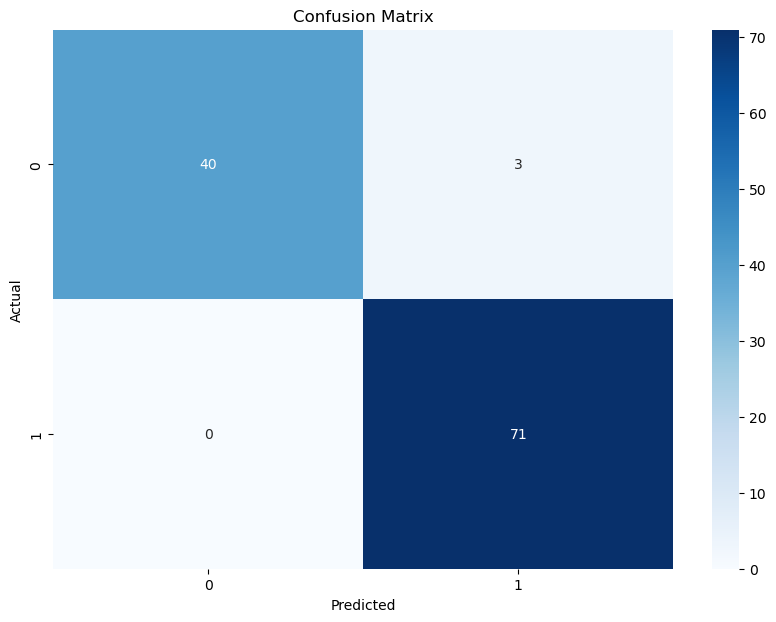

Cross-Validation Scores: [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
Mean CV Score: 0.94
GaussianNB - Mean CV Score: 0.94
KNeighborsClassifier - Mean CV Score: 0.93


C:\Users\13346\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\13346\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\13346\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\13346\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_clas

LogisticRegression - Mean CV Score: 0.95
SVC - Mean CV Score: 0.92


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Dataset
breast_cancer = load_breast_cancer()

#Checking Sample and Target
X, y = breast_cancer.data, breast_cancer.target
print(f"Samples: {X.shape[0]}, Features: {X.shape[1]}, Targets: {y.shape[0]}")

#Splitting Data for Training/Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training/Testing Set Sizes
print(f"Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")

#Creating Model
nb = GaussianNB()

#Training Model
nb.fit(X_train, y_train)

#Predicting
y_pred = nb.predict(X_test)

#Method Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

#Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

#Visualizing Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Cross-Validation
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=nb, X=X, y=y, cv=kfold)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {scores.mean():.2f}")

#Running Multiple Models
estimators = {
    'GaussianNB': nb,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

#Evaluating each model
for name, estimator in estimators.items():
    scores = cross_val_score(estimator=estimator, X=X, y=y, cv=kfold)
    print(f"{name} - Mean CV Score: {scores.mean():.2f}")